# Assignment 3
In this assignment, we will play with a couple of different interfaces for using the power of deep learning and pre-trained models to process natural language. We'll be working with a Fake News classification dataset from Kaggle.

There are two interfaces we'll work with:

- `sentence_transformers`, a library for using pre-trained models to get useful representations ("embeddings") of sentences. Not very flexible, but this is a common task and the interface is super simple.

- HuggingFace `transformers`, which is a general library for loading and fine-tuning many kinds of pre-trained models. `sentence_transformers` is built on top of `transformers`.

## Submission and grading

Please download this Colab notebook as an ipynb and submit that on Canvas before the deadline listed there.

## Colab
You will want to run this on a GPU in Colab, as it will be slow on a CPU. To do so, change the runtime type to use a GPU. The training should take <20mins. If you want this to run even faster, you can subscribe to Colab Pro to use the more powerful A100 GPUs.

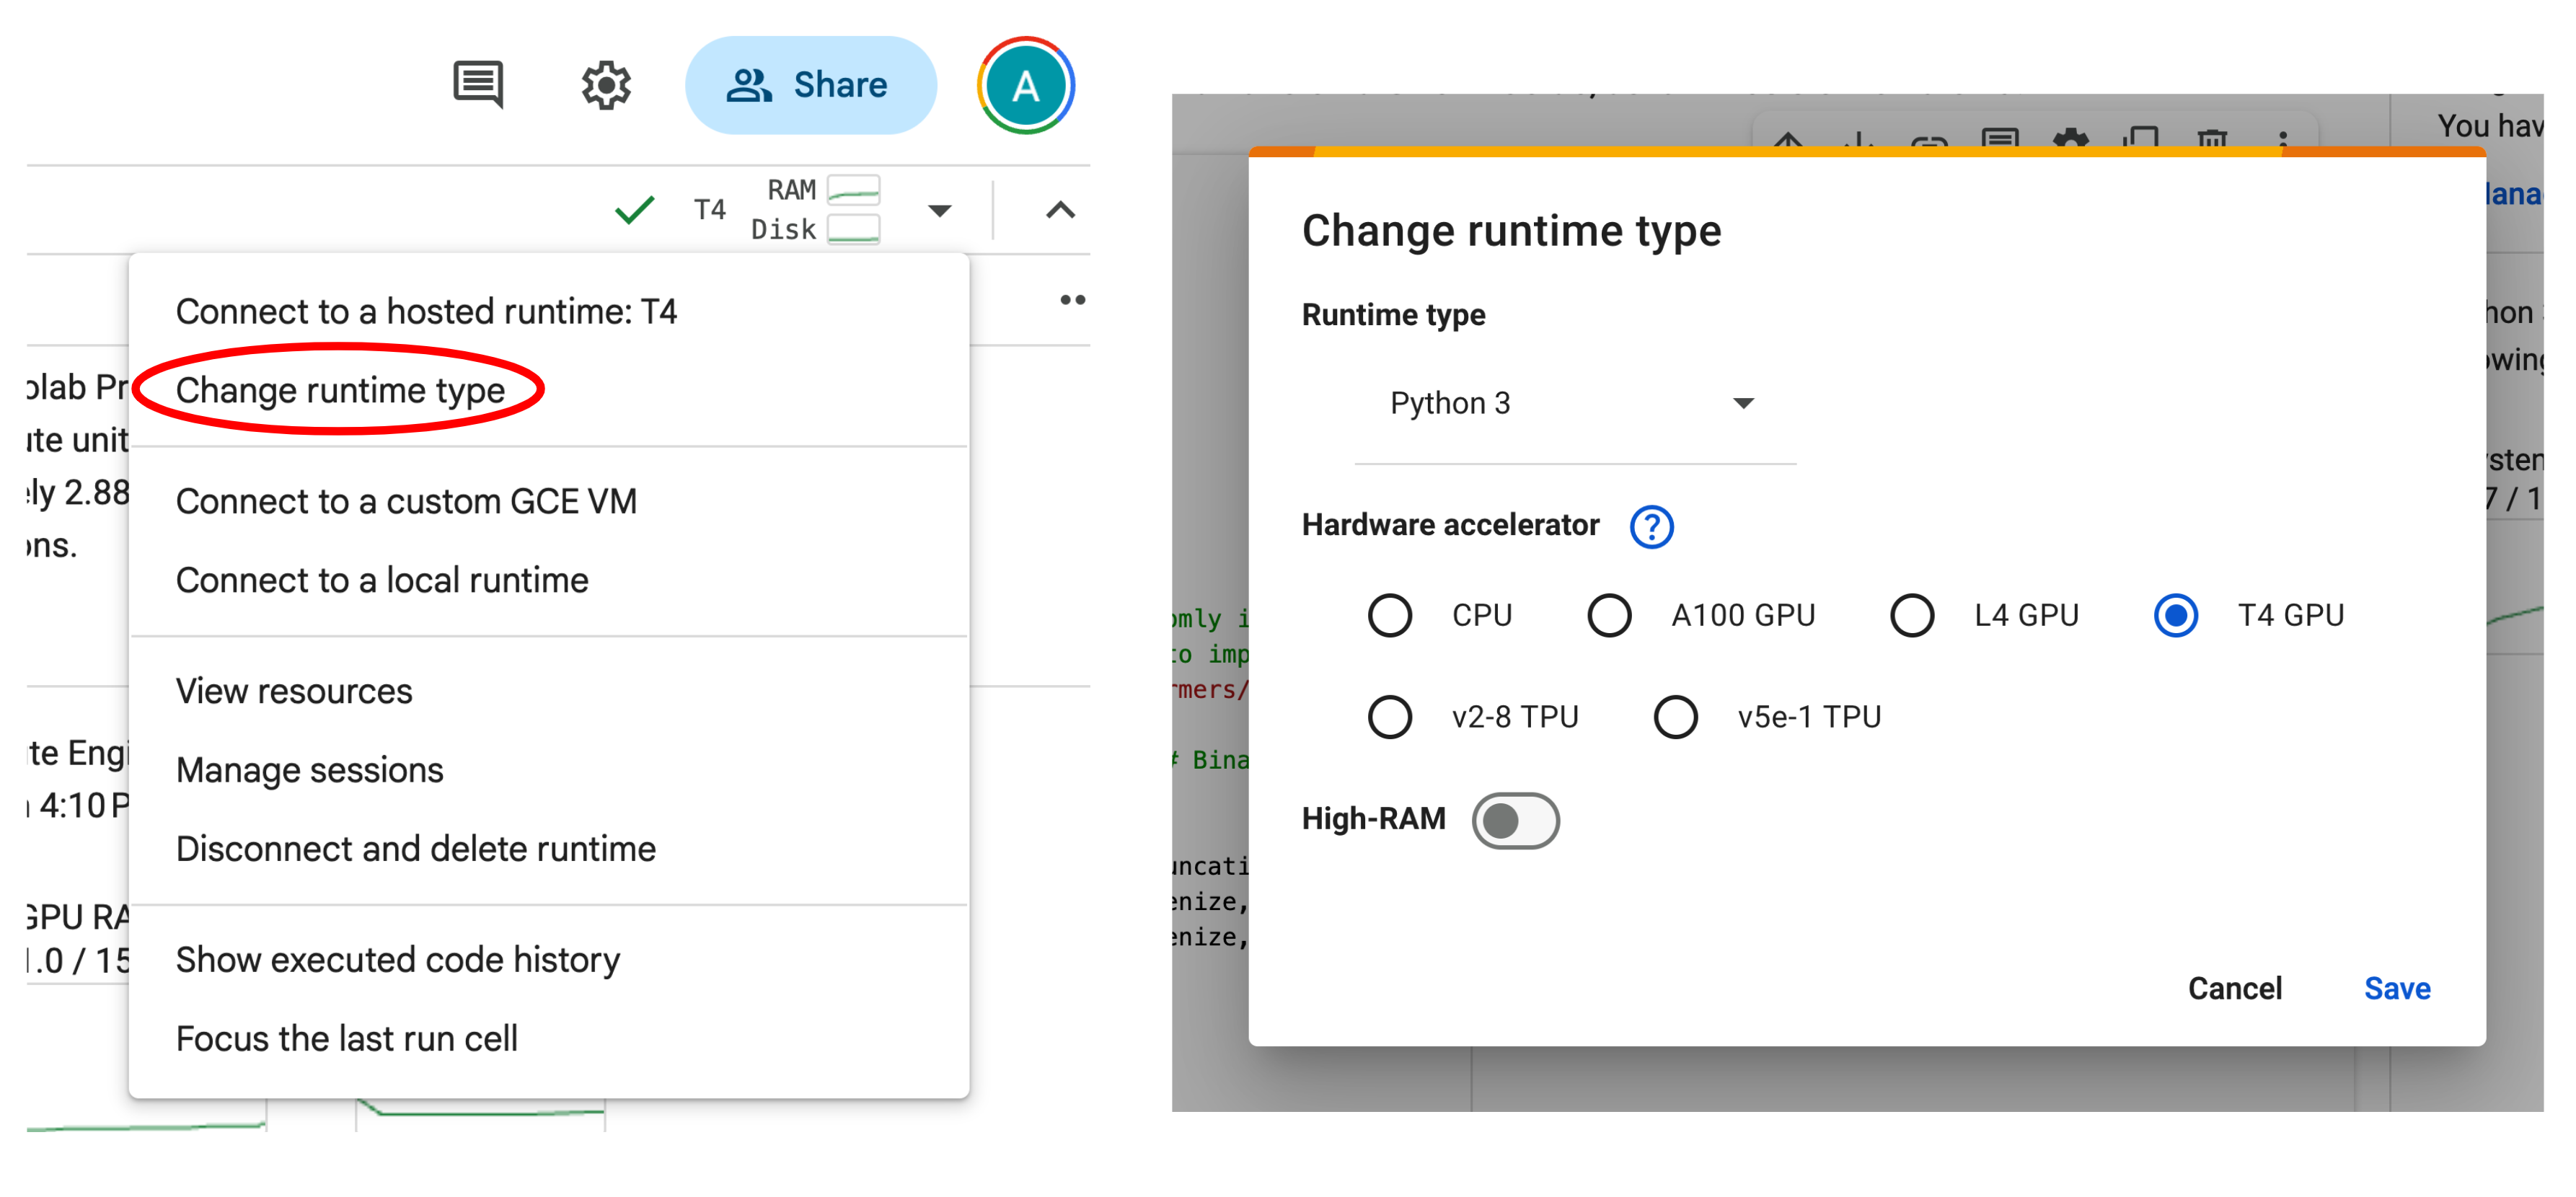

In [ ]:
!pip install datasets
import os
from typing import Dict, List

import kagglehub
import pandas as pd

from tqdm import tqdm, trange

from sklearn.model_selection import train_test_split
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")
df = pd.read_csv(os.path.join(path, "WELFake_Dataset.csv"), index_col=0)
df = df.dropna(subset=["title", "label"])
tr, te = train_test_split(df, test_size=0.2)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

100%|██████████| 92.1M/92.1M [00:05<00:00, 19.1MB/s]

Extracting files...


## 1. Playing with embeddings (6 points)

Many embedding models are designed so that sentences whose embeddings are close are also semantically similar.

Your first task will be to leverage this to create a simple text search engine. The dataset consists of a bunch of real and fake news articles, including their titles and text. For simplicity, we'll just work with the titles.

We're going to find the title that best matches a given search query. We will use the inner product (i.e., dot product) between the embeddings of the search query and the embeddings of the titles to find the best match.

1a. (2 points) Use `model.encode` to compute the embedding of the search query "Business applications of machine learning" and store it in a variable called `query_embedding`.

1b. (2 points) Compute the dot product of the query embedding with each embedding in `tr_embeds`. You can do this one by one with `np.dot`, or with matrix multiplication, or by multiplying and summing explicitly. Store the results in a variable called `inner_products`. This should be a 1D tensor of length `len(tr_embeds)`.

1c. (2 points) Find the title in the training set that is most similar to the query (i.e., corresponds to the maximum entry of `inner_products`). Store the title in a variable called `most_similar_title`. This should be a string containing the title.


In [ ]:
from sentence_transformers import SentenceTransformer
import os
import numpy as np

# This code downloads a pre-trained model and computes embeddings for the titles in the training and testing sets
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
tr_embeds = model.encode(tr['title'].to_list(), show_progress_bar=True, batch_size=32)
te_embeds = model.encode(te['title'].to_list(), show_progress_bar=True, batch_size=32)

query_embedding = model.encode("Business applications of machine learning")

inner_products = np.dot(tr_embeds, query_embedding)

most_similar_title = tr['title'].to_list()[np.argmax(inner_products)]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1790 [00:00<?, ?it/s]

Batches:   0%|          | 0/448 [00:00<?, ?it/s]


## 2. Transfer Learning (5 points)
Embeddings can also be used directly as features for prediction. Just treat them like any other vector of features (in this case, 384 features), and you can use arbitrary machine learning approaches on with these features. We've generated these "features" for you already in the form of `tr_embeds` and  `te_embeds`. The label column is called `label`, which is 0 for Real News and 1 for Fake News.

Use SKlearn's `LogisticRegression` to train a model using the embedding features to predict whether the news is fake or not. Train on the training set, and compute the accuracy of your model on the test set and store it in `logit_accuracy`

In [ ]:
# Train your model here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(tr_embeds, tr['label'])

# Predict labels for the test embeddings
predictions = clf.predict(te_embeds)

# Compute the accuracy of the model on the test set
logit_accuracy = accuracy_score(te['label'], predictions)
print("Test Accuracy:", logit_accuracy)


Test Accuracy: 0.8521933500977927


# Finetuning the whole model (4 points)
For even more power, we can fine-tune the entire embedding model, instead of just the final classification layer (which is what you're doing when you run logistic regression on top of the embeddings).

For your reference: The code below uses HuggingFace's Trainer interface, which abstracts away a lot of the details of model training in PyTorch for you. This is great for simplicity, but if you want to do anything custom, like adding in other features from your dataset, you will have to go back to the PyTorch level (similar code to the pytorch nn training notebook from class). You can find an example of that here: https://huggingface.co/docs/transformers/en/training

In [ ]:
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer
)
import numpy as np
from datasets import Dataset
import torch

# This will load the Embedding Model and then create a randomly initialized logistic
# regression layer on top of it. You will need to train it to improve the performance.
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModelForSequenceClassification.from_pretrained(
    "sentence-transformers/all-MiniLM-L6-V2", num_labels=2 # Binary classification
)

# The model expects to recieve tokenized text; this code will tokenize your article titles
# before they are passed to the Trainer.
tokenize = lambda x: tokenizer(x["title"], padding=True, truncation=True, return_tensors="pt", max_length=128)
tr_ds = Dataset.from_pandas(tr[["title", "label"]]).map(tokenize, batched=True)
te_ds = Dataset.from_pandas(te[["title", "label"]]).map(tokenize, batched=True)


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-V2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/57260 [00:00<?, ? examples/s]

Map:   0%|          | 0/14316 [00:00<?, ? examples/s]

In [ ]:
# When training, Trainer will get a batch of rows from the Dataset at each batch.
# This function tells the Trainer how to combine that batch of rows
# (which will start off as )
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir="checkpoints",
    evaluation_strategy="epoch",
    save_strategy='epoch',
    logging_dir="logs",
    report_to='tensorboard', # The logging backend; Tensorboard is basic but doesn't require a separate account; consider using wandb.ai
    learning_rate=1e-4,
    per_device_train_batch_size=512,
    logging_steps=10,
    num_train_epochs=5,
    load_best_model_at_end=True,
)

# This tells the Trainer what model to train and what data to use
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tr_ds,
    eval_dataset=te_ds,
    data_collator=data_collator,
)

# This actually trains the model
trainer.train()



/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.143400,0.158259
2,0.116600,0.154989
3,0.087600,0.149317
4,0.065900,0.153278
5,0.044000,0.163085


TrainOutput(global_step=560, training_loss=0.11475387614752565, metrics={'train_runtime': 807.0893, 'train_samples_per_second': 354.732, 'train_steps_per_second': 0.694, 'total_flos': 2021475532112400.0, 'train_loss': 0.11475387614752565, 'epoch': 5.0})

3.a (2 points) Explain each of the arguments in TrainingArguments in your own words.

### Training Arguments Configuration

- **output_dir**:
  - **Description**: Directory to save the model checkpoints.
  - **Value**: `"checkpoints"`

- **evaluation_strategy**:
  - **Description**: Determines when to evaluate the model.
  - **Value**: `"epoch"` - Evaluation occurs after each epoch.

- **save_strategy**:
  - **Description**: Determines when to save the model.
  - **Value**: `"epoch"` - The model is saved after each epoch.

- **logging_dir**:
  - **Description**: Directory to store logs for monitoring training progress.
  - **Value**: `"logs"`

- **report_to**:
  - **Description**: Where to report the training progress for visualization.
  - **Value**: `"tensorboard"` - Uses TensorBoard for visualization.

- **learning_rate**:
  - **Description**: Controls how quickly the model learns from the data.
  - **Value**: `1e-4`

- **per_device_train_batch_size**:
  - **Description**: Number of training examples processed per device in one forward/backward pass.
  - **Value**: `512`

- **logging_steps**:
  - **Description**: Frequency of logging training progress.
  - **Value**: `10` - Every 10 steps, training progress is printed.

- **num_train_epochs**:
  - **Description**: Number of times the entire dataset is passed through the neural network.
  - **Value**: `5`

- **load_best_model_at_end**:
  - **Description**: Whether to load the best model found during training at the end.
  - **Value**: `True`

3.b (2 points) The code below generates predictions on the test set. Inspect and extract the predictions for the Fake News class (LABEL_1) and compute the model's accuracy in predicting fake news on the test set. Assign this to a variable named `finetuned_accuracy`


In [ ]:
from transformers import TextClassificationPipeline
# This wraps your trained model and tokenizer together into a pipeline that
# can be called directly on text.
pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    batch_size=32,
    top_k=None # This returns all class probs, not just the most likely class
)
predictions = pipe(te.title.tolist())

predicted_labels = []
for pred in predictions:
    # Extract scores for both classes
    score_label0 = next(item for item in pred if item['label'] == 'LABEL_0')['score']
    score_label1 = next(item for item in pred if item['label'] == 'LABEL_1')['score']

    predicted_labels.append(1 if score_label1 > score_label0 else 0)

finetuned_accuracy = accuracy_score(te['label'], predicted_labels)
print("Fine-tuned model accuracy:", finetuned_accuracy)


Device set to use cuda:0


Fine-tuned model accuracy: 0.9494970662196144
